In [1]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
mp_selfie = mp.solutions.selfie_segmentation

(520, 704, 3)


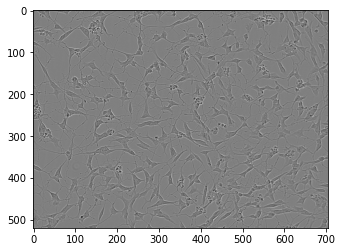

In [7]:
img = cv2.imread('cell.png')
plt.imshow(img)
print(img.shape)

In [12]:
with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    res = model.process(img)
    


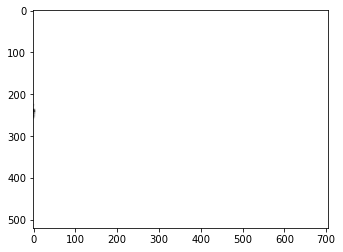

In [16]:
plt.imshow(res.segmentation_mask, cmap='binary')

In [5]:
cap = cv2.VideoCapture(0)

with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        _, frame = cap.read()
        frame = cv2.flip(frame, 1)
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        result = model.process(frame)
        
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        frame.flags.writeable = True

        cv2.imshow("Selfie Segmentation", frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
mp_selfie.SelfieSegmentation??

In [7]:
result.segmentation_mask.shape

(480, 640)

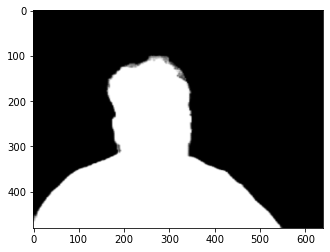

In [8]:
plt.imshow(result.segmentation_mask, cmap = 'gray')

uint8


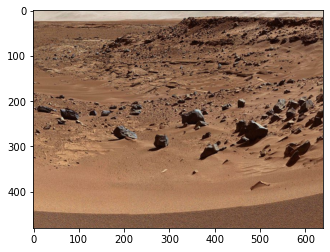

In [9]:
background = cv2.imread('mars.jpg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
background = cv2.resize(background, (640,480))
print(background.dtype)
plt.imshow(background)

In [10]:
mask = np.stack((result.segmentation_mask,)*3, axis=-1) > 0.5
# mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

In [11]:
mask.shape

(480, 640, 3)

In [12]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
segmented_image = np.where(mask, frame, background)
segmented_image

array([[[215, 203, 191],
        [214, 202, 190],
        [213, 201, 189],
        ...,
        [211, 199, 185],
        [213, 201, 187],
        [211, 199, 185]],

       [[213, 201, 188],
        [212, 200, 187],
        [212, 200, 187],
        ...,
        [209, 197, 183],
        [210, 198, 184],
        [207, 195, 181]],

       [[212, 200, 186],
        [212, 200, 186],
        [212, 200, 186],
        ...,
        [207, 195, 181],
        [209, 197, 183],
        [206, 194, 180]],

       ...,

       [[ 93,  23,  35],
        [ 94,  24,  36],
        [ 96,  26,  34],
        ...,
        [118,  76,  54],
        [127,  85,  63],
        [119,  77,  55]],

       [[ 92,  22,  32],
        [ 94,  25,  34],
        [ 96,  26,  34],
        ...,
        [134,  92,  70],
        [118,  76,  54],
        [113,  71,  49]],

       [[ 94,  21,  32],
        [ 96,  24,  34],
        [ 97,  25,  34],
        ...,
        [121,  80,  58],
        [116,  74,  52],
        [ 97,  56,  34]]

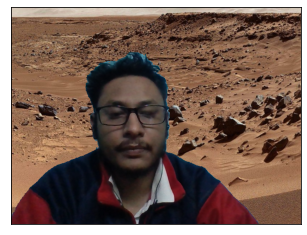

In [13]:
plt.xticks([])
plt.yticks([])
plt.imshow(segmented_image)

In [14]:
cap = cv2.VideoCapture(0)

with mp_selfie.SelfieSegmentation(model_selection=0) as model:
    while cap.isOpened():
        _, frame = cap.read()
        frame = cv2.flip(frame,1)
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        result = model.process(frame)
        frame.flags.writeable = True
        background = cv2.imread('mars.jpg')
        background = cv2.resize(background, (640,480))
        mask = np.stack((result.segmentation_mask,)*3, axis=-1) > 0.5
        
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        segmented_image = np.where(mask, frame, background)
        
        cv2.imshow("Selfie Segmentation", segmented_image)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [15]:
import gradio as gr

In [16]:
def segment(img):
    with mp_selfie.SelfieSegmentation(model_selection=0) as model:
        result = model.process(img)
        mask = np.stack((result.segmentation_mask,)*3, axis=-1) > 0.5
        
        background = cv2.imread('mars.jpg')
        background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)
        background = cv2.resize(background, (640,480))
        
        return np.where(mask, img, background)

In [17]:
webcam = gr.inputs.Image(shape=(640,480), source="webcam")

In [18]:
webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs='image')

In [19]:
webapp.launch()

Running on local URL:  http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.


(<Flask 'gradio.networking'>, 'http://127.0.0.1:7860/', None)